In [39]:
from sklearn.metrics import median_absolute_error

y_true = [3,-0.5,2,7]
y_pred = [2.5,0,2,8]
median_absolute_error(y_true, y_pred)

0.5

In [40]:
from sklearn.metrics import mean_squared_error
#RMSE는 sklearn에서 지원하지 않음

y_true = [3,-0.5,2,7]
y_pred = [2.5,0,2,8]
mean_squared_error(y_true, y_pred)

0.375

In [41]:
from sklearn.metrics import r2_score
#상관계수 : 0~1사이의 값으로 클수록 적합도가 높음

y_true = [3,-0.5,2,7]
y_pred = [2.5,0,2,8]
r2_score(y_true, y_pred)

0.9486081370449679

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
#Holdout Method

X, y = np.arange(10).reshape((5, 2)), range(5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np

In [44]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [45]:
x_data=boston.data
y_data=boston.target.reshape(boston.target.size,1)
x_data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [46]:
from sklearn import preprocessing
#데이터를 모두 0~1 사이 값으로 변경
minmax_scale=preprocessing.MinMaxScaler().fit(x_data)
x_scaled_data=minmax_scale.transform(x_data)

x_scaled_data[:3]

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, 0.00000000e+00,
        3.14814815e-01, 5.77505269e-01, 6.41606591e-01, 2.69203139e-01,
        0.00000000e+00, 2.08015267e-01, 2.87234043e-01, 1.00000000e+00,
        8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, 0.00000000e+00,
        1.72839506e-01, 5.47997701e-01, 7.82698249e-01, 3.48961980e-01,
        4.34782609e-02, 1.04961832e-01, 5.53191489e-01, 1.00000000e+00,
        2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, 0.00000000e+00,
        1.72839506e-01, 6.94385898e-01, 5.99382080e-01, 3.48961980e-01,
        4.34782609e-02, 1.04961832e-01, 5.53191489e-01, 9.89737254e-01,
        6.34657837e-02]])

In [47]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x_scaled_data, y_data, test_size=0.2)

In [48]:
from sklearn import linear_model
#모델 생성(weight값 설정)
regr=linear_model.LinearRegression(fit_intercept=True, #상수항여부
                                  normalize=False,
                                  copy_X=True,         #데이터 복사여부
                                  n_jobs=8)            #cpu개수 지정
regr.fit(x_scaled_data, y_data)
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=False)

In [49]:
regr.coef_, regr.intercept_

(array([[ -9.60975755,   4.64204584,   0.56083933,   2.68673382,
          -8.63457306,  19.88368651,   0.06721501, -16.22666104,
           7.03913802,  -6.46332721,  -8.95582398,   3.69282735,
         -19.01724361]]),
 array([26.62026758]))

In [50]:
y_true=y_test
y_pred=regr.predict(X_test)
np.sqrt(((y_true-y_pred)**2).sum()/len(y_true))

5.434093211990259

In [52]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_true,y_pred))

5.434093211990259

In [4]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
df=pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
X=df.values
y=boston.target

In [1]:
from sklearn.linear_model import LinearRegression
lr_ne=LinearRegression(fit_intercept=True)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)

In [11]:
lr_ne.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_hat=lr_ne.predict(X_test)
y_true=y_test

In [13]:
rmse=np.sqrt((((y_hat-y_true)**2).sum()/len(y_true)))
rmse

4.55236459846306

In [14]:
import sklearn
mse=sklearn.metrics.mean_squared_error(y_hat, y_true)
mse

20.72402343733974

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

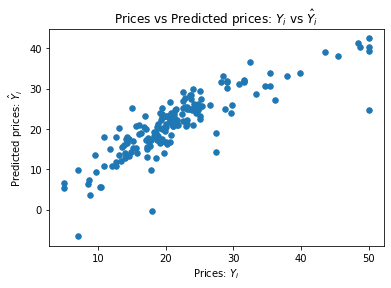

In [18]:
plt.scatter(y_true, y_hat, s=30)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [19]:
lr_ne.coef_

array([-1.28749718e-01,  3.78232228e-02,  5.82109233e-02,  3.23866812e+00,
       -1.61698120e+01,  3.90205116e+00, -1.28507825e-02, -1.42222430e+00,
        2.34853915e-01, -8.21331947e-03, -9.28722459e-01,  1.17695921e-02,
       -5.47566338e-01])

In [20]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [21]:
from sklearn.linear_model import SGDRegressor
lr_SGD=SGDRegressor()

In [22]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
std_scaler.fit(X)
X_scaled=std_scaler.transform(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.33, random_state=42)

In [24]:
lr_SGD.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [25]:
y_hat=lr_SGD.predict(X_test)
y_true=y_test

In [26]:
mse=sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse=np.sqrt((((y_hat-y_true)**2).sum()/len(y_true)))
rmse, mse #rmse값에 문제가 있음->스케일링하지 않았기 때문

(212503283464422.22, 4.515764548316058e+28)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

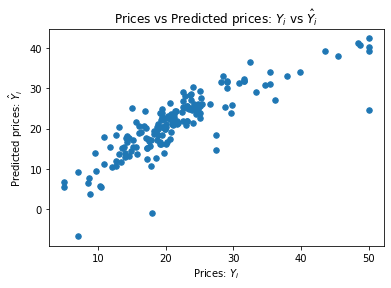

In [36]:
plt.scatter(y_true, y_hat, s=30)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [29]:
from sklearn.linear_model import Lasso, Ridge

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [32]:
ridge=Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
y_hat=ridge.predict(X_test)
y_true=y_test
mse=sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse=np.sqrt((((y_hat-y_true)**2).sum()/len(y_true)))
rmse, mse

(4.579058484791169, 20.967776607137992)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

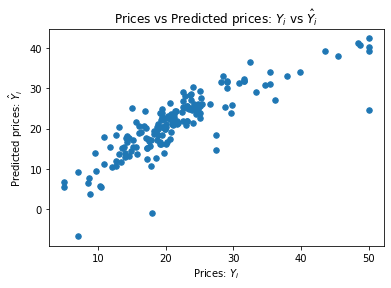

In [37]:
plt.scatter(y_true, y_hat, s=30)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [38]:
from sklearn.model_selection import KFold

print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha=np.linspace(.01,20,50)
t_rmse=np.array([])
cv_rmse=np.array([])

for a in alpha:
    ridge=Ridge(fit_intercept=True, alpha=a)
    
    ridge.fit(X_train, y_train)
    p=ridge.predict(X_test)
    err=p-y_test
    total_error=np.dot(err,err)
    rmse_train=np.sqrt(total_error/len(p))
    
    kf = KFold(10)
    xval_err = 0
    for train, test in kf.split(X):
        ridge.fit(X[train], y[train])
        p = ridge.predict(X[test])
        err = p - y[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(X))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 4.5529		 5.8757
0.418	 4.5749		 5.8419
0.826	 4.5935		 5.8270
1.234	 4.6074		 5.8186
1.642	 4.6180		 5.8126
2.050	 4.6262		 5.8078
2.458	 4.6327		 5.8034
2.866	 4.6379		 5.7993
3.274	 4.6422		 5.7953
3.682	 4.6458		 5.7912
4.090	 4.6489		 5.7873
4.498	 4.6515		 5.7833
4.906	 4.6538		 5.7793
5.313	 4.6558		 5.7753
5.721	 4.6576		 5.7714
6.129	 4.6593		 5.7674
6.537	 4.6607		 5.7635
6.945	 4.6621		 5.7596
7.353	 4.6633		 5.7557
7.761	 4.6644		 5.7518
8.169	 4.6655		 5.7479
8.577	 4.6665		 5.7441
8.985	 4.6674		 5.7404
9.393	 4.6683		 5.7366
9.801	 4.6691		 5.7329
10.209	 4.6699		 5.7292
10.617	 4.6707		 5.7256
11.025	 4.6714		 5.7220
11.433	 4.6722		 5.7184
11.841	 4.6729		 5.7149
12.249	 4.6735		 5.7114
12.657	 4.6742		 5.7079
13.065	 4.6748		 5.7045
13.473	 4.6755		 5.7011
13.881	 4.6761		 5.6978
14.289	 4.6767		 5.6945
14.697	 4.6773		 5.6912
15.104	 4.6779		 5.6880
15.512	 4.6785		 5.6848
15.920	 4.6791		 5.6816
16.328	 4.6797		 5

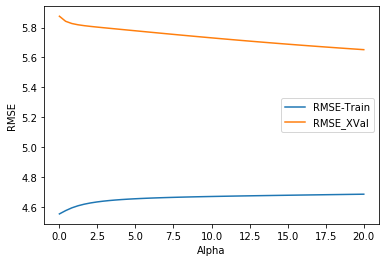

In [39]:
plt.plot(alpha, t_rmse, label='RMSE-Train')
plt.plot(alpha, cv_rmse, label='RMSE_XVal')
plt.legend( ('RMSE-Train', 'RMSE_XVal') )
plt.ylabel('RMSE')
plt.xlabel('Alpha')
plt.show()

In [40]:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ]:
    met.fit(X_train,y_train)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(X_test)
    e = p-y_test
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(10)
    err = 0
    for train,test in kf.split(X):
        met.fit(X[train],y[train])
        p = met.predict(X[test])
        e = p-y[test]
        err += np.dot(e,e)

    rmse_10cv = np.sqrt(err/len(X))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: linear regression
RMSE on training: 4.5524
RMSE on 10-fold CV: 5.8770
Method: lasso
RMSE on training: 4.7242
RMSE on 10-fold CV: 5.7637
Method: ridge
RMSE on training: 4.5687
RMSE on 10-fold CV: 5.8487
